In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from sklearn.utils import shuffle
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import joblib
from keras.models import model_from_json
import os
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

import seaborn as sns

from sklearn import preprocessing, svm 
from sklearn import tree
from sklearn import neighbors

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error 

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from scipy.stats import pearsonr


from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import XGBClassifier

from random import seed
from random import randrange
from csv import reader
from math import sqrt



from sklearn.metrics import accuracy_score, confusion_matrix

## Naive Bayes

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GNB.sav to GNB.sav


In [ ]:
gnb = joblib.load('GNB.sav')

In [ ]:
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

## Random Forest

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RF.sav to RF.sav


In [ ]:
rf = joblib.load('RF.sav')

In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

## Logistic Regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LogReg.sav to LogReg.sav


In [ ]:
logreg = joblib.load('LogReg.sav')

In [ ]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## AdaBoost

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ADB.sav to ADB.sav


In [ ]:
adb = joblib.load('ADB.sav')

In [ ]:
adb

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=75)

## Decision Tree Gini

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving D_Tree_G.sav to D_Tree_G.sav


In [ ]:
dtree_g = joblib.load('D_Tree_G.sav')

In [ ]:
dtree_g

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=121, splitter='best')

## Decision Tree Entropy

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving D_Tree_E.sav to D_Tree_E.sav


In [ ]:
dtree_e = joblib.load('D_Tree_E.sav')

In [ ]:
dtree_e

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

## KNN

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KNN.sav to KNN.sav


In [ ]:
knn = joblib.load('KNN.sav')

In [ ]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## CNN

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cnn.json to cnn.json


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cnn.h5 to cnn.h5


In [ ]:
json_file = open('cnn.json','r')
loaded_cnn_json = json_file.read()
json_file.close()
loaded_cnn = model_from_json(loaded_cnn_json)
loaded_cnn.load_weights("cnn.h5")
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_cnn.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

## Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test_Clips_1.csv to Test_Clips_1.csv


In [ ]:
df = pd.read_csv('Test_Clips_1.csv')

df = df.fillna(0)

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0.1,0.2,0.3,0.4
0,-11.014460,-13.728128,-17.660004,-16.514824,-16.004210,-17.886162,-19.818199,-20.007641,-16.751900,-17.895878,-16.702629,-16.349924,-17.678389,-20.520172,-18.939838,-16.614258,-19.457043,-20.118717,-20.759911,-19.697828,-18.630159,-18.536272,-17.785515,-18.164696,-21.332762,-23.459459,-18.588875,-17.879553,-19.198586,-21.951794,-24.679979,-25.581978,-21.708290,-20.540091,-19.950487,-20.062971,-20.415554,-19.312428,-18.731352,-19.465801,...,-11.005655,-10.116663,-10.112986,-9.854547,-11.418269,-13.682600,-15.743953,-14.089492,-13.443708,-13.216263,-18.900776,-21.546833,-18.394819,-16.610680,-13.919073,-13.766137,-13.991070,-14.109838,-13.678583,-14.241969,-16.335634,-17.409901,-16.809599,-14.697377,-15.431675,-17.629751,-17.783716,-18.030758,-17.274088,-16.474924,-18.255814,-19.948561,-21.287376,-23.608059,-19.482897,-16.538425,242.307692,9.877799,sarcasm,SAR1.wav
1,-15.793550,-14.479053,-15.768708,-18.641258,-17.874107,-16.920488,-17.442272,-16.632637,-17.819231,-18.182875,-16.456114,-16.110050,-16.122221,-16.171581,-16.502193,-16.220715,-14.943018,-16.246769,-15.474578,-13.761420,-12.650707,-13.236430,-14.875747,-13.055038,-13.354296,-15.714976,-17.800142,-15.043943,-14.686569,-15.914027,-13.802914,-13.406567,-13.048910,-13.548128,-11.752665,-12.045635,-13.715881,-12.768270,-10.072077,-11.199890,...,-16.714638,-16.953753,-16.913979,-15.851765,-15.387633,-15.072419,-16.609062,-16.732698,-16.318392,-15.330153,-15.833688,-17.045515,-16.092299,-16.221981,-14.936127,-15.042090,-16.620907,-14.862963,-14.442289,-16.902786,-16.590000,-16.633955,-16.468031,-16.895836,-17.900784,-16.118694,-14.238750,-14.805220,-15.818145,-16.492088,-15.298700,-14.927423,-15.885423,-17.238487,-16.358568,-16.660313,177.777778,12.193555,sadness,SAD2.wav
2,-10.728317,-12.746290,-17.757929,-14.574193,-14.285773,-14.766641,-14.547663,-13.494988,-13.450343,-14.696441,-14.278203,-13.715997,-13.501308,-13.791350,-14.719102,-18.193554,-24.476118,-27.786028,-27.398396,-26.979195,-25.128418,-25.387203,-28.245819,-19.483936,-16.134575,-14.592123,-14.261734,-14.173815,-13.978045,-14.279558,-14.407172,-14.258147,-14.393321,-14.904374,-15.166188,-15.193979,-15.787831,-17.556398,-19.125448,-19.988285,...,-20.871189,-22.233921,-19.175198,-20.264290,-21.682442,-21.271904,-20.894600,-19.788454,-17.888525,-15.056710,-15.009032,-15.128623,-20.095512,-28.907227,-31.757427,-28.966749,-29.763458,-17.323641,-12.785542,-13.950721,-15.323236,-15.787330,-15.946662,-14.996500,-14.223026,-13.870319,-14.023500,-13.715936,-13.217222,-13.201043,-13.265620,-13.760360,-14.062688,-14.585799,-16.353695,-18.433563,258.064516,11.770717,anger,ANG1.wav
3,-10.505746,-10.557508,-11.143297,-10.161523,-9.140228,-9.695555,-8.707957,-6.285563,-4.032925,-4.855814,-7.812320,-11.660192,-17.766321,-14.438134,-7.230930,-5.551696,-6.237275,-8.597355,-8.491020,-6.500621,-8.051365,-10.663864,-13.655799,-20.335276,-23.140331,-25.019033,-23.885012,-24.067024,-25.205647,-25.022270,-23.076582,-22.901072,-22.814697,-10.505382,-7.694690,-8.982870,-7.729104,-8.023431,-7.838265,-8.119558,...,-7.252980,-6.334002,-5.492877,-5.626005,-7.722611,-14.176815,-14.988291,-12.258704,-15.746737,-22.393562,-26.969173,-28.822252,-27.265560,-29.330982,-19.669741,-10.558420,-6.360513,-5.150708,-5.510244,-6.543590,-6.148323,-6.452629,-7.156578,-7.461504,-6.974090,-8.524652,-9.656802,-7.822206,-6.955296,-6.738076,-7.429216,-8.947301,-9.794353,-9.126889,-6.187553,-3.303124,200.000000,13.752558,neutral,NEU1.wav
4,-2.969997,-4.719795,-1.848656,1.217577,-1.287035,-5.322466,-3.652644,-2.032567,-5.955170,-9.156565,-8.611881,-8.072613,-8.243143,-8.198928,-6.925825,-5.364983,-4.915359,-7.139854,-14.953047,-15.853499,-13.100495,-12.778804,-5.407514,-3.601679,-5.449890

In [ ]:
df.rename(columns={"0.1":"pitch","0.2":"lfbe","0.3":"actual_emotion","0.4":"file_name"},inplace=True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,pitch,lfbe,actual_emotion,file_name
0,-11.014460,-13.728128,-17.660004,-16.514824,-16.004210,-17.886162,-19.818199,-20.007641,-16.751900,-17.895878,-16.702629,-16.349924,-17.678389,-20.520172,-18.939838,-16.614258,-19.457043,-20.118717,-20.759911,-19.697828,-18.630159,-18.536272,-17.785515,-18.164696,-21.332762,-23.459459,-18.588875,-17.879553,-19.198586,-21.951794,-24.679979,-25.581978,-21.708290,-20.540091,-19.950487,-20.062971,-20.415554,-19.312428,-18.731352,-19.465801,...,-11.005655,-10.116663,-10.112986,-9.854547,-11.418269,-13.682600,-15.743953,-14.089492,-13.443708,-13.216263,-18.900776,-21.546833,-18.394819,-16.610680,-13.919073,-13.766137,-13.991070,-14.109838,-13.678583,-14.241969,-16.335634,-17.409901,-16.809599,-14.697377,-15.431675,-17.629751,-17.783716,-18.030758,-17.274088,-16.474924,-18.255814,-19.948561,-21.287376,-23.608059,-19.482897,-16.538425,242.307692,9.877799,sarcasm,SAR1.wav
1,-15.793550,-14.479053,-15.768708,-18.641258,-17.874107,-16.920488,-17.442272,-16.632637,-17.819231,-18.182875,-16.456114,-16.110050,-16.122221,-16.171581,-16.502193,-16.220715,-14.943018,-16.246769,-15.474578,-13.761420,-12.650707,-13.236430,-14.875747,-13.055038,-13.354296,-15.714976,-17.800142,-15.043943,-14.686569,-15.914027,-13.802914,-13.406567,-13.048910,-13.548128,-11.752665,-12.045635,-13.715881,-12.768270,-10.072077,-11.199890,...,-16.714638,-16.953753,-16.913979,-15.851765,-15.387633,-15.072419,-16.609062,-16.732698,-16.318392,-15.330153,-15.833688,-17.045515,-16.092299,-16.221981,-14.936127,-15.042090,-16.620907,-14.862963,-14.442289,-16.902786,-16.590000,-16.633955,-16.468031,-16.895836,-17.900784,-16.118694,-14.238750,-14.805220,-15.818145,-16.492088,-15.298700,-14.927423,-15.885423,-17.238487,-16.358568,-16.660313,177.777778,12.193555,sadness,SAD2.wav
2,-10.728317,-12.746290,-17.757929,-14.574193,-14.285773,-14.766641,-14.547663,-13.494988,-13.450343,-14.696441,-14.278203,-13.715997,-13.501308,-13.791350,-14.719102,-18.193554,-24.476118,-27.786028,-27.398396,-26.979195,-25.128418,-25.387203,-28.245819,-19.483936,-16.134575,-14.592123,-14.261734,-14.173815,-13.978045,-14.279558,-14.407172,-14.258147,-14.393321,-14.904374,-15.166188,-15.193979,-15.787831,-17.556398,-19.125448,-19.988285,...,-20.871189,-22.233921,-19.175198,-20.264290,-21.682442,-21.271904,-20.894600,-19.788454,-17.888525,-15.056710,-15.009032,-15.128623,-20.095512,-28.907227,-31.757427,-28.966749,-29.763458,-17.323641,-12.785542,-13.950721,-15.323236,-15.787330,-15.946662,-14.996500,-14.223026,-13.870319,-14.023500,-13.715936,-13.217222,-13.201043,-13.265620,-13.760360,-14.062688,-14.585799,-16.353695,-18.433563,258.064516,11.770717,anger,ANG1.wav
3,-10.505746,-10.557508,-11.143297,-10.161523,-9.140228,-9.695555,-8.707957,-6.285563,-4.032925,-4.855814,-7.812320,-11.660192,-17.766321,-14.438134,-7.230930,-5.551696,-6.237275,-8.597355,-8.491020,-6.500621,-8.051365,-10.663864,-13.655799,-20.335276,-23.140331,-25.019033,-23.885012,-24.067024,-25.205647,-25.022270,-23.076582,-22.901072,-22.814697,-10.505382,-7.694690,-8.982870,-7.729104,-8.023431,-7.838265,-8.119558,...,-7.252980,-6.334002,-5.492877,-5.626005,-7.722611,-14.176815,-14.988291,-12.258704,-15.746737,-22.393562,-26.969173,-28.822252,-27.265560,-29.330982,-19.669741,-10.558420,-6.360513,-5.150708,-5.510244,-6.543590,-6.148323,-6.452629,-7.156578,-7.461504,-6.974090,-8.524652,-9.656802,-7.822206,-6.955296,-6.738076,-7.429216,-8.947301,-9.794353,-9.126889,-6.187553,-3.303124,200.000000,13.752558,neutral,NEU1.wav
4,-2.969997,-4.719795,-1.848656,1.217577,-1.287035,-5.322466,-3.652644,-2.032567,-5.955170,-9.156565,-8.611881,-8.072613,-8.243143,-8.198928,-6.925825,-5.364983,-4.915359,-7.139854,-14.953047,-15.853499,-13.100495,-12.778804,-5.407514

## Mapping emotions to integers

In [ ]:
new_emotions = []
for i in range(len(df['actual_emotion'])):
  if df.iloc[i]['actual_emotion']=='anger':
    new_emotions.append(1)
  if df.iloc[i]['actual_emotion']=='happiness':
    new_emotions.append(2)
  if df.iloc[i]['actual_emotion']=='fear':
    new_emotions.append(3)
  if df.iloc[i]['actual_emotion']=='neutral':
    new_emotions.append(4)
  if df.iloc[i]['actual_emotion']=='sadness':
    new_emotions.append(5)
  if df.iloc[i]['actual_emotion']=='sarcasm':
    new_emotions.append(6)
 

df['emotions_encoded'] = np.array(new_emotions)

## Training features and labels

In [ ]:
X = df.iloc[:,:-3].values
y1 = df['emotions_encoded'].values
y2 = df['actual_emotion'].values

## Scaled training features for LogReg

In [ ]:
sc_x = StandardScaler()
X1 = sc_x.fit_transform(X) 


## CNN transformation

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_cnn = np.array(X)
y_cnn = np.array(y1)


lb = LabelEncoder()


y_cnn = np_utils.to_categorical(lb.fit_transform(y_cnn.ravel()))
x_cnn =np.expand_dims(X_cnn, axis=2)


## Names

In [ ]:
name =['anger','fear','happiness','neutral','sadness','sarcasm']

## Prediction Routine

In [ ]:
gnb_predict = gnb.predict(X)
rf_predict = rf.predict(X)
logreg_predict = logreg.predict(X1)
adb_predict = adb.predict(X)
dtree_gini_predict = dtree_g.predict(X)
dtree_entropy_predict = dtree_e.predict(X)
knn_predict = knn.predict(X)
cnn_predict_intermediate = loaded_cnn.predict(x_cnn)
cnn_predict = np.argmax(cnn_predict_intermediate,axis = 1)
cnn_predict=cnn_predict+1

In [ ]:
rf_predicted_emotions_int = []
cnn_predicted_emotions_int = []

for i in range(len(rf_predict)):
  if rf_predict[i] == 1:
    rf_predicted_emotions_int.append("anger")
  if rf_predict[i] == 2:
    rf_predicted_emotions_int.append("fear")
  if rf_predict[i] == 3:
    rf_predicted_emotions_int.append("happiness")
  if rf_predict[i] == 4:
    rf_predicted_emotions_int.append("neutral")
  if rf_predict[i] == 5:
    rf_predicted_emotions_int.append("sadness")
  if rf_predict[i] == 6:
    rf_predicted_emotions_int.append("sarcasm")

for i in range(len(cnn_predict)):
  if cnn_predict[i] == 1:
    cnn_predicted_emotions_int.append("anger")
  if cnn_predict[i] == 2:
    cnn_predicted_emotions_int.append("fear")
  if cnn_predict[i] == 3:
    cnn_predicted_emotions_int.append("happiness")
  if cnn_predict[i] == 4:
    cnn_predicted_emotions_int.append("neutral")
  if cnn_predict[i] == 5:
    cnn_predicted_emotions_int.append("sadness")
  if cnn_predict[i] == 6:
    cnn_predicted_emotions_int.append("sarcasm")
 

In [ ]:
cnn_predicted_emotions = np.array(cnn_predicted_emotions_int)
rf_predicted_emotions = np.array(rf_predicted_emotions_int)

In [ ]:
file_name = df['file_name'].values
actual_emotion = df['actual_emotion']

In [ ]:
predicted_df_dict = {'Naive Bayes':gnb_predict, 'LogReg':logreg_predict, 'AdaBoost':adb_predict,'D Tree Gini':dtree_gini_predict, 'D_Tree_E':dtree_entropy_predict,'Random Forest':rf_predicted_emotions, 'KNN':knn_predict, 'CNN':cnn_predicted_emotions, 'Actual Emotion':df['actual_emotion'].values, 'File name': df['file_name'].values}

In [ ]:
predicted_df = pd.DataFrame(predicted_df_dict)

In [ ]:
predicted_df

,Naive Bayes,LogReg,AdaBoost,D Tree Gini,D_Tree_E,Random Forest,KNN,CNN,Actual Emotion,File name
0,neutral,sadness,sadness,anger,sadness,anger,fear,sadness,sarcasm,SAR1.wav
1,neutral,happiness,fear,fear,fear,fear,sadness,sarcasm,sadness,SAD2.wav
2,neutral,sarcasm,anger,anger,anger,happiness,fear,fear,anger,ANG1.wav
3,neutral,fear,neutral,fear,fear,happiness,fear,neutral,neutral,NEU1.wav
4,neutral,sadness,fear,fear,fear,happiness,fear,sarcasm,neutral,NEU2.wav
5,neutral,neutral,anger,anger,anger,anger,anger,fear,happiness,HAP1.wav
6,neutral,anger,fear,fear,anger,anger,anger,anger,happiness,HAP2.wav
7,neutral,anger,anger,anger,anger,fear,happiness,sadness,anger,ANG2.wav
8,neutral,neutral,neutral,neutral,neutral,sarcasm,fear,fear,sadness,SAD1.wav
9,neutral,anger,anger,anger,anger,happiness,fear,anger,fear,FEA2.wav


In [ ]:
predicted_df[predicted_df['Actual Emotion']=='anger']

,Naive Bayes,LogReg,AdaBoost,D Tree Gini,D_Tree_E,Random Forest,KNN,CNN,Actual Emotion,File name
2,neutral,sarcasm,anger,anger,anger,happiness,fear,fear,anger,ANG1.wav
7,neutral,anger,anger,anger,anger,fear,happiness,sadness,anger,ANG2.wav


In [ ]:
predicted_df[predicted_df['Actual Emotion']=='fear']

,Naive Bayes,LogReg,AdaBoost,D Tree Gini,D_Tree_E,Random Forest,KNN,CNN,Actual Emotion,File name
9,neutral,anger,anger,anger,anger,happiness,fear,anger,fear,FEA2.wav
10,neutral,happiness,fear,anger,happiness,anger,anger,sadness,fear,FEA1.wav


In [ ]:
predicted_df[predicted_df['Actual Emotion']=='happiness']

,Naive Bayes,LogReg,AdaBoost,D Tree Gini,D_Tree_E,Random Forest,KNN,CNN,Actual Emotion,File name
5,neutral,neutral,anger,anger,anger,anger,anger,fear,happiness,HAP1.wav
6,neutral,anger,fear,fear,anger,anger,anger,anger,happiness,HAP2.wav


In [ ]:
predicted_df[predicted_df['Actual Emotion']=='neutral']

,Naive Bayes,LogReg,AdaBoost,D Tree Gini,D_Tree_E,Random Forest,KNN,CNN,Actual Emotion,File name
3,neutral,fear,neutral,fear,fear,happiness,fear,neutral,neutral,NEU1.wav
4,neutral,sadness,fear,fear,fear,happiness,fear,sarcasm,neutral,NEU2.wav


In [ ]:
predicted_df[predicted_df['Actual Emotion']=='sadness']

,Naive Bayes,LogReg,AdaBoost,D Tree Gini,D_Tree_E,Random Forest,KNN,CNN,Actual Emotion,File name
1,neutral,happiness,fear,fear,fear,fear,sadness,sarcasm,sadness,SAD2.wav
8,neutral,neutral,neutral,neutral,neutral,sarcasm,fear,fear,sadness,SAD1.wav


In [ ]:
predicted_df[predicted_df['Actual Emotion']=='sarcasm']

,Naive Bayes,LogReg,AdaBoost,D Tree Gini,D_Tree_E,Random Forest,KNN,CNN,Actual Emotion,File name
0,neutral,sadness,sadness,anger,sadness,anger,fear,sadness,sarcasm,SAR1.wav
11,fear,fear,fear,sadness,anger,happiness,fear,fear,sarcasm,SAR2.wav


## Classification reports and confusion matrices

AdaBoost

              precision    recall  f1-score   support

       anger       0.50      1.00      0.67         2
        fear       0.20      0.50      0.29         2
   happiness       0.00      0.00      0.00         2
     neutral       0.50      0.50      0.50         2
     sadness       0.00      0.00      0.00         2
     sarcasm       0.00      0.00      0.00         2

    accuracy                           0.33        12
   macro avg       0.20      0.33      0.24        12
weighted avg       0.20      0.33      0.24        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


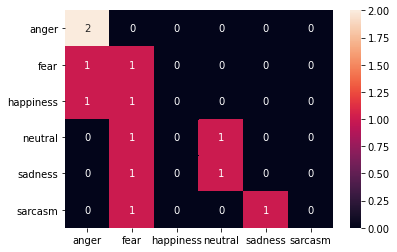

In [ ]:
print(classification_report(y2, adb_predict, target_names=name))


cf_matrix = confusion_matrix(y2, adb_predict,)
sns.heatmap(cf_matrix, annot=True, xticklabels=name, yticklabels=name)

LogReg

              precision    recall  f1-score   support

       anger       0.33      0.50      0.40         2
        fear       0.00      0.00      0.00         2
   happiness       0.00      0.00      0.00         2
     neutral       0.00      0.00      0.00         2
     sadness       0.00      0.00      0.00         2
     sarcasm       0.00      0.00      0.00         2

    accuracy                           0.08        12
   macro avg       0.06      0.08      0.07        12
weighted avg       0.06      0.08      0.07        12



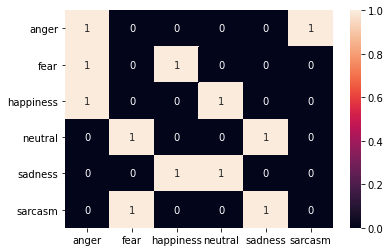

In [ ]:
print(classification_report(y2, logreg_predict, target_names=name))


cf_matrix = confusion_matrix(y2, logreg_predict,)
sns.heatmap(cf_matrix, annot=True, xticklabels=name, yticklabels=name)

Decision Tree Gini



              precision    recall  f1-score   support

       anger       0.33      1.00      0.50         2
        fear       0.00      0.00      0.00         2
   happiness       0.00      0.00      0.00         2
     neutral       0.00      0.00      0.00         2
     sadness       0.00      0.00      0.00         2
     sarcasm       0.00      0.00      0.00         2

    accuracy                           0.17        12
   macro avg       0.06      0.17      0.08        12
weighted avg       0.06      0.17      0.08        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


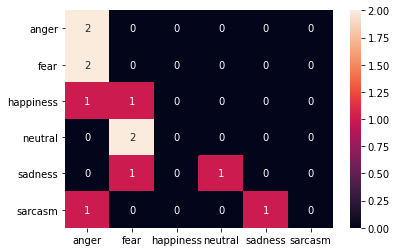

In [ ]:
print(classification_report(y2, dtree_gini_predict, target_names=name))


cf_matrix = confusion_matrix(y2, dtree_gini_predict,)
sns.heatmap(cf_matrix, annot=True, xticklabels=name, yticklabels=name)

Decision Tree Entropy

              precision    recall  f1-score   support

       anger       0.33      1.00      0.50         2
        fear       0.00      0.00      0.00         2
   happiness       0.00      0.00      0.00         2
     neutral       0.00      0.00      0.00         2
     sadness       0.00      0.00      0.00         2
     sarcasm       0.00      0.00      0.00         2

    accuracy                           0.17        12
   macro avg       0.06      0.17      0.08        12
weighted avg       0.06      0.17      0.08        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


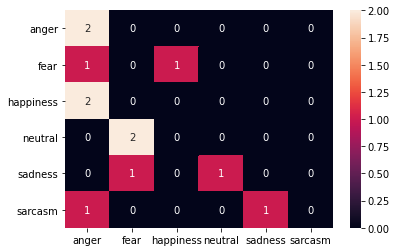

In [ ]:
print(classification_report(y2, dtree_entropy_predict, target_names=name))


cf_matrix = confusion_matrix(y2, dtree_entropy_predict,)
sns.heatmap(cf_matrix, annot=True, xticklabels=name, yticklabels=name)

Naive Bayes

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
        fear       0.00      0.00      0.00         2
   happiness       0.00      0.00      0.00         2
     neutral       0.18      1.00      0.31         2
     sadness       0.00      0.00      0.00         2
     sarcasm       0.00      0.00      0.00         2

    accuracy                           0.17        12
   macro avg       0.03      0.17      0.05        12
weighted avg       0.03      0.17      0.05        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


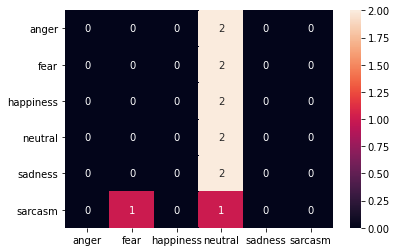

In [ ]:
print(classification_report(y2, gnb_predict, target_names=name))


cf_matrix = confusion_matrix(y2, gnb_predict,)
sns.heatmap(cf_matrix, annot=True, xticklabels=name, yticklabels=name)

KNN

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
        fear       0.14      0.50      0.22         2
   happiness       0.00      0.00      0.00         2
     neutral       0.00      0.00      0.00         2
     sadness       1.00      0.50      0.67         2
     sarcasm       0.00      0.00      0.00         2

    accuracy                           0.17        12
   macro avg       0.19      0.17      0.15        12
weighted avg       0.19      0.17      0.15        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


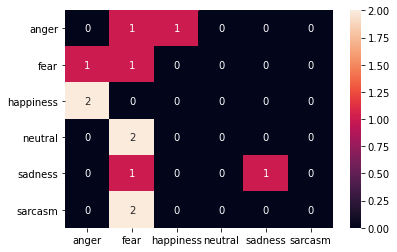

In [ ]:
print(classification_report(y2, knn_predict, target_names=name))


cf_matrix = confusion_matrix(y2, knn_predict,)
sns.heatmap(cf_matrix, annot=True, xticklabels=name, yticklabels=name)

 CNN

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
        fear       0.00      0.00      0.00         2
   happiness       0.00      0.00      0.00         2
     neutral       1.00      0.50      0.67         2
     sadness       0.00      0.00      0.00         2
     sarcasm       0.00      0.00      0.00         2

    accuracy                           0.08        12
   macro avg       0.17      0.08      0.11        12
weighted avg       0.17      0.08      0.11        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


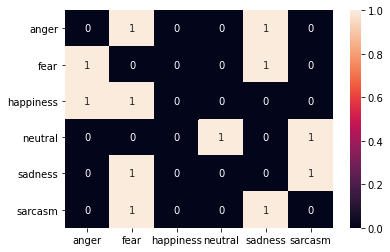

In [ ]:
print(classification_report(y2, cnn_predicted_emotions, target_names=name))


cf_matrix = confusion_matrix(y2, cnn_predicted_emotions,)
sns.heatmap(cf_matrix, annot=True, xticklabels=name, yticklabels=name)

RF

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       2.0
        fear       0.00      0.00      0.00       2.0
   happiness       0.00      0.00      0.00       2.0
     neutral       0.00      0.00      0.00       2.0
     sadness       0.00      0.00      0.00       2.0
     sarcasm       0.00      0.00      0.00       2.0

    accuracy                           0.00      12.0
   macro avg       0.00      0.00      0.00      12.0
weighted avg       0.00      0.00      0.00      12.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


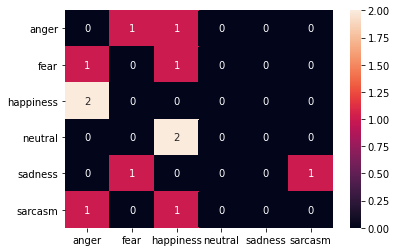

In [ ]:
print(classification_report(y2, rf_predicted_emotions, target_names=name))


cf_matrix = confusion_matrix(y2, rf_predicted_emotions,)
sns.heatmap(cf_matrix, annot=True, xticklabels=name, yticklabels=name)